Downloaded the IOT Sensing data for recycle water dataset from Kaggle:
https://www.kaggle.com/datasets/ekleenkaur17/iot-sensing-data-for-recycled-water

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv("IOTMeterData.csv")

In [3]:
data.head(10)

,Temperature (�C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (�mhos/cm)
0,30.6,7.5,47.0,48.9,5421,4.0,0.13,208
1,30.6,7.2,45.8,47.0,5632,4.0,0.12,210
2,30.6,7.1,45.4,48.1,5550,4.0,0.10,219
3,30.6,7.1,45.6,48.9,5444,4.0,0.12,220
4,30.6,7.2,46.0,47.0,5218,3.9,0.13,215
5,30.6,7.2,46.3,48.1,5222,4.0,0.12,220
6,30.6,7.2,46.1,48.9,5219,4.0,0.15,222
7,30.6,7.2,45.9,47.0,5225,4.0,0.15,228
8,30.6,7.2,46.2,48.1,5231,3.9,0.13,225
9,30.6,7.0,45.6,48.7,5233,4.0,0.10,230


# Conductivity will be the target column at this study.

The decision was made by checking the dataset, I visualized that the main changes were happening on the conductivity. There are some parameters that are very similar or equal to other lines, however the conductivity was changing and that intrigued me to discover what other paramenters were influenciating the most on the changes happening. 

With that observation I wanted to start understanding what could be making such big difference for the recycled water to be more or less conductive.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature (�C)                  1000 non-null   float64
 1   pH                                1000 non-null   float64
 2   Turbidity (NTU)                   1000 non-null   float64
 3   BOD (mg/l)                        1000 non-null   float64
 4   Fecal Coliform (MPN/100ml)        1000 non-null   int64  
 5   Disolved Oxygen (mg/l)            1000 non-null   float64
 6   NITRATENAN N+ NITRITENANN (mg/l)  1000 non-null   float64
 7   Conductivity (�mhos/cm)           1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


The dataset is small, only up to 1000 entries, which means it is very small. However, I thought it would be perfect to be a first project and apply all the end-to-end knowledge learned through the course at Centennial College.

In [5]:
data.describe()

,Temperature (�C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (�mhos/cm)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,32.131600,7.450400,45.095000,44.991100,5287.422000,3.827500,0.156550,298.871000
std,2.067355,0.302045,1.957792,4.466587,187.107785,0.196857,0.052826,49.806536
min,28.000000,6.800000,42.100000,30.900000,4699.000000,3.200000,0.100000,204.000000
25%,30.800000,7.200000,43.500000,44.400000,5222.000000,3.800000,0.100000,255.000000
50%,31.500000,7.400000,44.500000,46.500000,5317.000000,3.900000,0.140000,290.500000
75%,32.600000,7.600000,46.600000,48.200000,5428.000000,4.000000,0.190000,335.000000
max,38.800000,8.200000,50.900000,50.700000,5643.000000,4.000000,0.300000,405.000000


In [6]:
data.shape

(1000, 8)

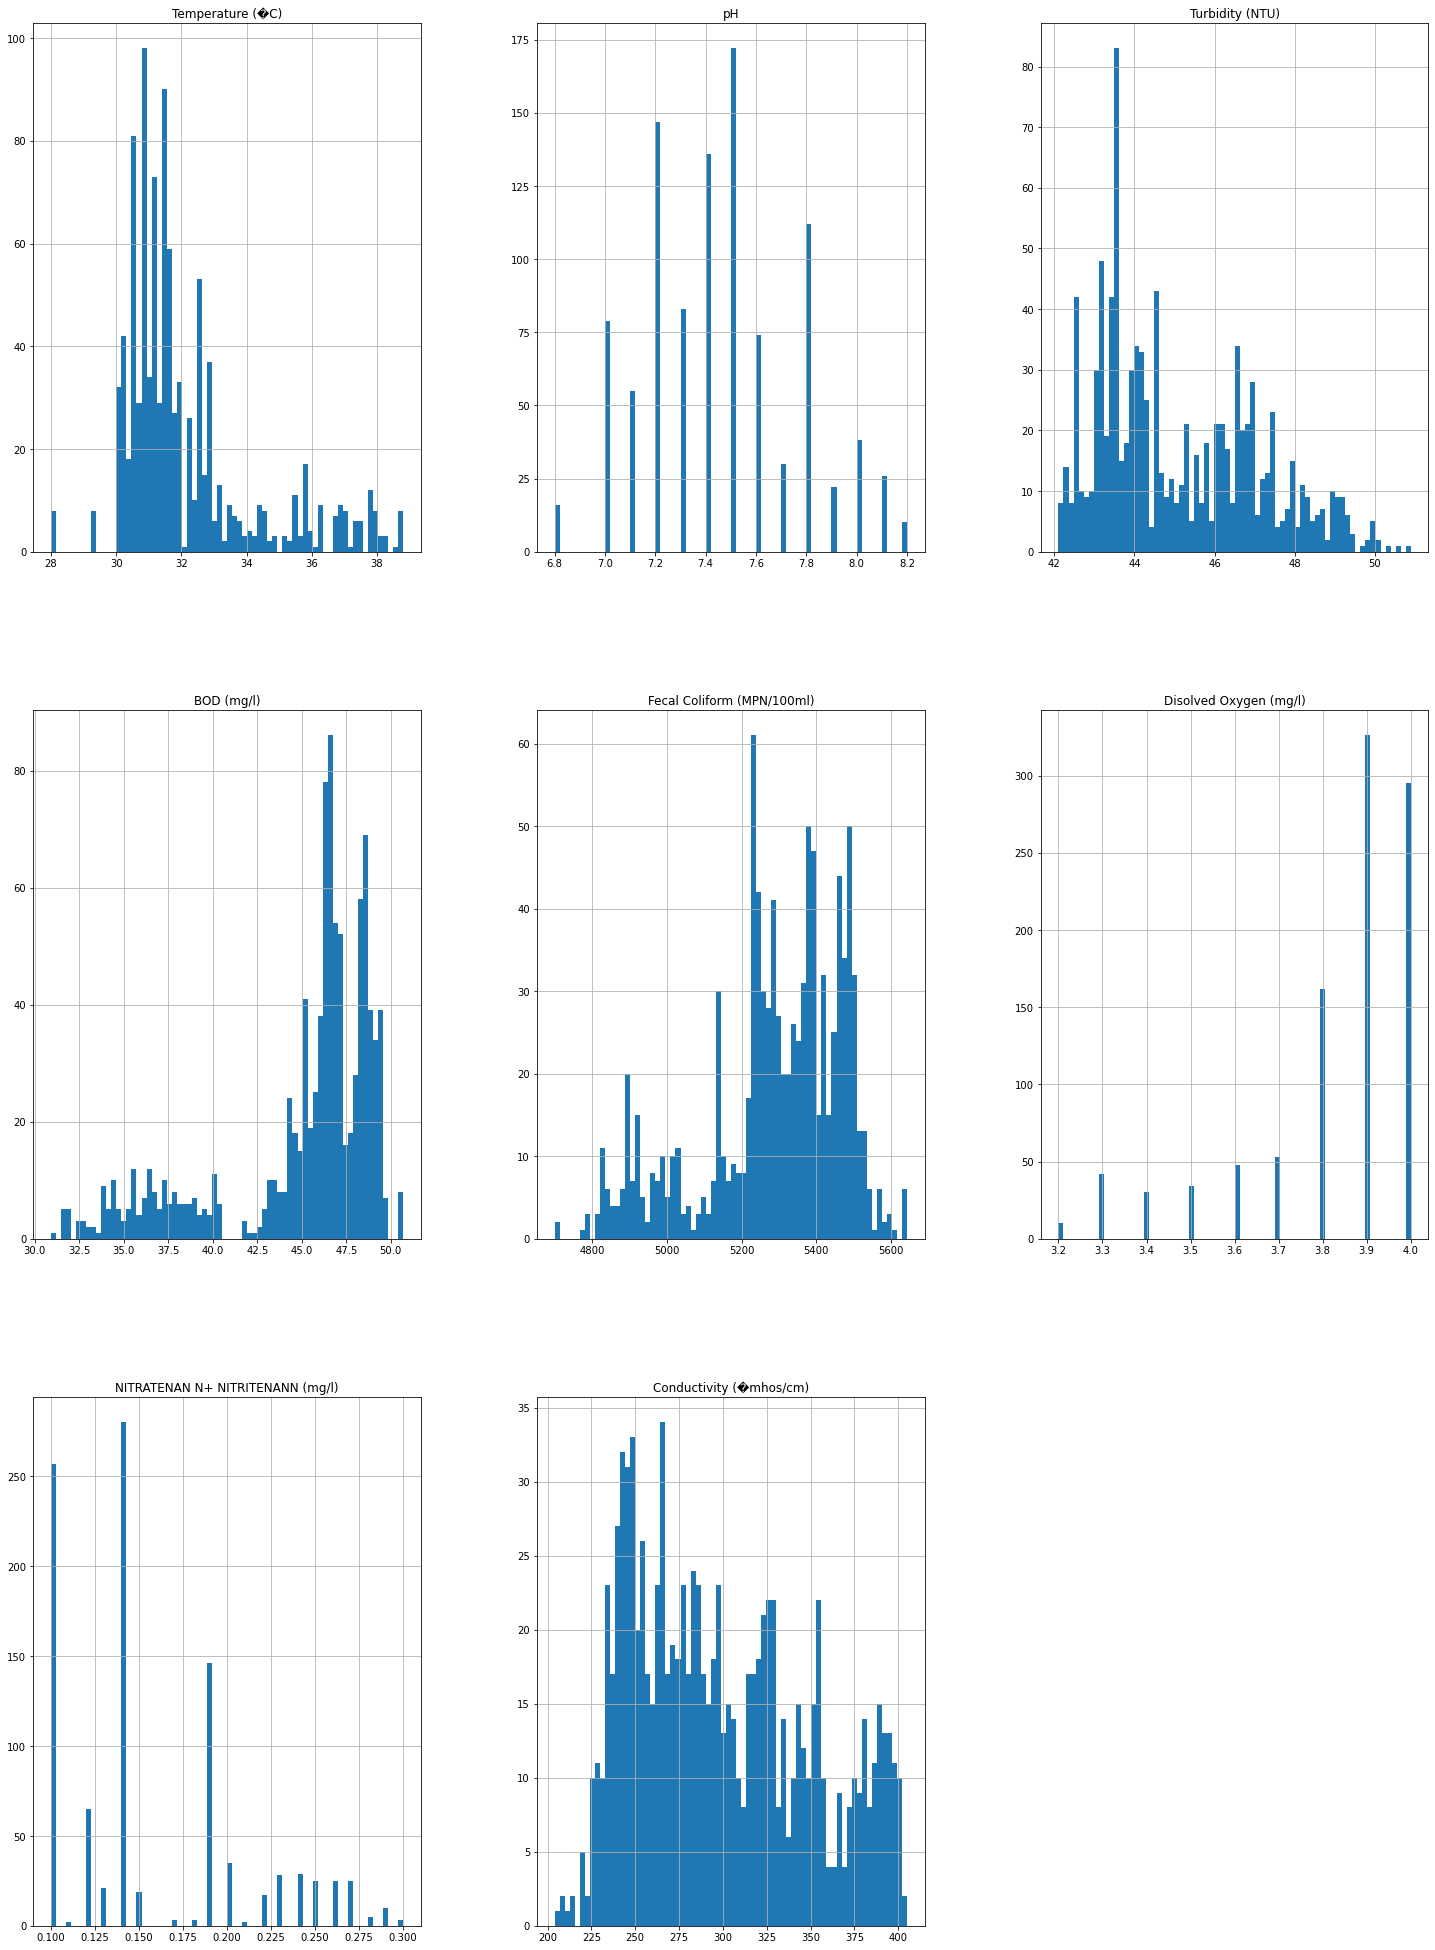

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=70, figsize=(25,35))
plt.show()

Through the histogram other observations can be made:

    - Temperature has high peak values from 30°C - 32°C
    
    - Fecal coliform has high range from 5200 to 5400 MPN/100ml
    
    - BOD has it's peak about 45mg/l to 50mg/l
    
    - Turbidity has a peak from 42NTU to 41NTU
    
This study will try to verify which variable impacts the most the conductivity of the recycled water

Text(0.5, 1.0, 'Scatterplot Conductivity vs Temperature')

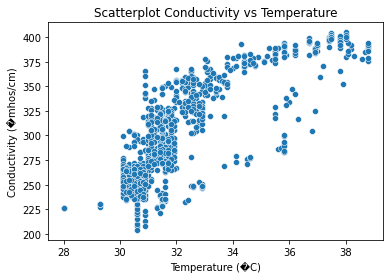

In [8]:
import seaborn as sns
ax = sns.scatterplot(x="Temperature (�C)",y="Conductivity (�mhos/cm)",data=data)
ax.set_title("Scatterplot Conductivity vs Temperature")

Text(0.5, 1.0, 'Scatterplot Conductivity vs pH')

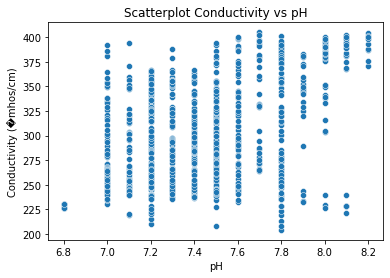

In [9]:
ax_ph = sns.scatterplot(x="pH",y="Conductivity (�mhos/cm)",data=data)
ax_ph.set_title("Scatterplot Conductivity vs pH")

In [10]:
correlation_map = data.corr()
round(correlation_map, 2)

,Temperature (�C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (�mhos/cm)
Temperature (�C),1.00,0.52,0.65,-0.96,-0.84,-0.93,0.90,0.79
pH,0.52,1.00,0.48,-0.52,-0.38,-0.54,0.42,0.37
Turbidity (NTU),0.65,0.48,1.00,-0.67,-0.53,-0.63,0.62,0.46
BOD (mg/l),-0.96,-0.52,-0.67,1.00,0.82,0.93,-0.88,-0.76
Fecal Coliform (MPN/100ml),-0.84,-0.38,-0.53,0.82,1.00,0.79,-0.83,-0.76
Disolved Oxygen (mg/l),-0.93,-0.54,-0.63,0.93,0.79,1.00,-0.84,-0.74
NITRATENAN N+ NITRITENANN (mg/l),0.90,0.42,0.62,-0.88,-0.83,-0.84,1.00,0.80
Conductivity (�mhos/cm),0.79,0.37,0.46,-0.76,-0.76,-0.74,0.80,1.00


<AxesSubplot:>

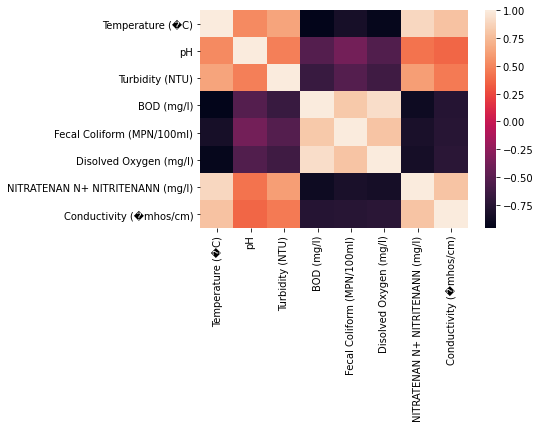

In [11]:
sns.heatmap(correlation_map)

By checking the heatmap, Conductivity has the very minimum correlations with the columns of:

    - BOD
    
    - Fecal Coliform
    
    - Disolved Oxygen
    
And strong correlation towards:

    - Nitratetan N+
    
    - Turbidity
    
    - pH
    
    - Temperature
    
For advancing, columns will low correlation will be dropped, since by further analysis of the heatmap they don't have many correlations with the other columns that have strong correlation with Conductivity.

In [12]:
data = data.drop(['BOD (mg/l)','Fecal Coliform (MPN/100ml)','Disolved Oxygen (mg/l)'],axis =1)
data.head()

,Temperature (�C),pH,Turbidity (NTU),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (�mhos/cm)
0,30.6,7.5,47.0,0.13,208
1,30.6,7.2,45.8,0.12,210
2,30.6,7.1,45.4,0.10,219
3,30.6,7.1,45.6,0.12,220
4,30.6,7.2,46.0,0.13,215


In [13]:
correlation_map2 = data.corr()
round(correlation_map2,2)

,Temperature (�C),pH,Turbidity (NTU),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (�mhos/cm)
Temperature (�C),1.00,0.52,0.65,0.90,0.79
pH,0.52,1.00,0.48,0.42,0.37
Turbidity (NTU),0.65,0.48,1.00,0.62,0.46
NITRATENAN N+ NITRITENANN (mg/l),0.90,0.42,0.62,1.00,0.80
Conductivity (�mhos/cm),0.79,0.37,0.46,0.80,1.00


<AxesSubplot:>

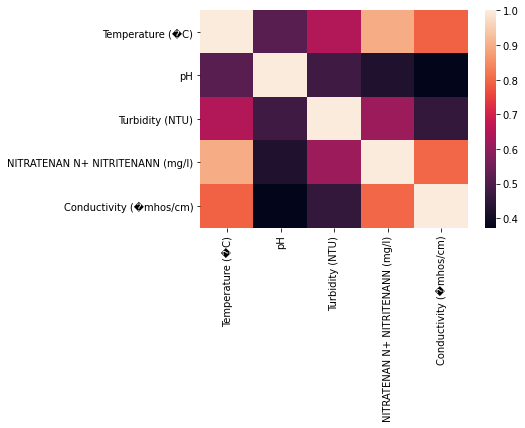

In [14]:
sns.heatmap(correlation_map2)

By analysing just the new heatmap, it is possible to see that the stronger correlations are with the following columns:

    - Temperature
    
    - Nitratenan N+
    
Both interact between each other, which leads to believe that the temperature and the nitrate have something to do with the conductivity of the water.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [16]:
conductivity_data = data['Conductivity (�mhos/cm)']
data = data.drop(['Conductivity (�mhos/cm)'],axis=1)

X = data
y = conductivity_data

In [17]:
print(X.shape, y.shape)

(1000, 4) (1000,)


In [18]:
X.head()

,Temperature (�C),pH,Turbidity (NTU),NITRATENAN N+ NITRITENANN (mg/l)
0,30.6,7.5,47.0,0.13
1,30.6,7.2,45.8,0.12
2,30.6,7.1,45.4,0.10
3,30.6,7.1,45.6,0.12
4,30.6,7.2,46.0,0.13


In [19]:
y.head()

0    208
1    210
2    219
3    220
4    215
Name: Conductivity (�mhos/cm), dtype: int64